<a href="https://colab.research.google.com/gist/ApoorvaR05/759c5227c5c287a88e0dbee444e8ae2d/untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/banking-clients.csv")

In [ ]:
import pandas as pd
import io
import os

# Assuming the uploaded file is in the current directory or /content
file_name = None
for f in os.listdir('/content'):
  if f.endswith('.csv.xlsx'):
    file_name = f
    break

if file_name:
  print(f"Found file: {file_name}")
  try:
    # Try reading as CSV first
    df = pd.read_csv(f'/content/{file_name}')
    print("Successfully read as CSV.")
  except Exception as csv_error:
    print(f"Could not read as CSV: {csv_error}")
    try:
      # If CSV fails, try reading as Excel
      df = pd.read_excel(f'/content/{file_name}')
      print("Successfully read as Excel.")
    except Exception as excel_error:
      print(f"Could not read as Excel: {excel_error}")
      print("Could not read the file as either CSV or Excel. Please check the file format.")
else:
  print("No file with .csv.xlsx extension found in /content.")

# Display the first few rows if successfully loaded
if 'df' in locals():
  print("\nDataFrame head:")
  display(df.head())

Found file: banking-clients.csv.xlsx
Could not read as CSV: 'utf-8' codec can't decode byte 0xd2 in position 16: invalid continuation byte
Successfully read as Excel.

DataFrame head:


Client ID             Name  Age  Location ID Joined Bank   Banking Contact  \
0  IND81288    Raymond Mills   24        34324  2019-05-06    Anthony Torres   
1  IND65833    Julia Spencer   23        42205  2001-12-10  Jonathan Hawkins   
2  IND47499   Stephen Murray   27         7314  2010-01-25     Anthony Berry   
3  IND72498   Virginia Garza   40        34594  2019-03-28        Steve Diaz   
4  IND60181  Melissa Sanders   46        41269  2012-07-20        Shawn Long   

  Nationality            Occupation Fee Structure Loyalty Classification  ...  \
0    American  Safety Technician IV          High                   Jade  ...   
1     African   Software Consultant          High                   Jade  ...   
2    European    Help Desk Operator          High                   Gold  ...   
3    American          Geologist II           Mid                 Silver  ...   
4    American   Assistant Professor           Mid               Platinum  ...   

   Bank Deposits  Checking Accounts  Saving Accounts  \
0     1485828.64          603617.88        607332.46   
1      641482.79          229521.37        344635.16   
2     1033401.59          652674.69        203054.35   
3     1048157.49         1048157.49        234685.02   
4      487782.53          446644.25        128351.45   

   Foreign Currency Account  Business Lending  Properties Owned  \
0                  12249.96        1134475.30                 1   
1                  61162.31        2000526.10                 1   
2                  79071.78         548137.58                 1   
3                  57513.65        1148402.29                 0   
4                  30012.14        1674412.12                 0   

   Risk Weighting  BRId  GenderId  IAId  
0               2     1         1     1  
1               3     2         1     2  
2               3     3         2     3  
3               4     4         1     4  
4               3     1         2     5  

[5 rows x 25 columns]

In [ ]:
df.head(5)

Client ID             Name  Age  Location ID Joined Bank   Banking Contact  \
0  IND81288    Raymond Mills   24        34324  2019-05-06    Anthony Torres   
1  IND65833    Julia Spencer   23        42205  2001-12-10  Jonathan Hawkins   
2  IND47499   Stephen Murray   27         7314  2010-01-25     Anthony Berry   
3  IND72498   Virginia Garza   40        34594  2019-03-28        Steve Diaz   
4  IND60181  Melissa Sanders   46        41269  2012-07-20        Shawn Long   

  Nationality            Occupation Fee Structure Loyalty Classification  ...  \
0    American  Safety Technician IV          High                   Jade  ...   
1     African   Software Consultant          High                   Jade  ...   
2    European    Help Desk Operator          High                   Gold  ...   
3    American          Geologist II           Mid                 Silver  ...   
4    American   Assistant Professor           Mid               Platinum  ...   

   Bank Deposits  Checking Accounts  Saving Accounts  \
0     1485828.64          603617.88        607332.46   
1      641482.79          229521.37        344635.16   
2     1033401.59          652674.69        203054.35   
3     1048157.49         1048157.49        234685.02   
4      487782.53          446644.25        128351.45   

   Foreign Currency Account  Business Lending  Properties Owned  \
0                  12249.96        1134475.30                 1   
1                  61162.31        2000526.10                 1   
2                  79071.78         548137.58                 1   
3                  57513.65        1148402.29                 0   
4                  30012.14        1674412.12                 0   

   Risk Weighting  BRId  GenderId  IAId  
0               2     1         1     1  
1               3     2         1     2  
2               3     3         2     3  
3               4     4         1     4  
4               3     1         2     5  

[5 rows x 25 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Client ID                 3000 non-null   object        
 1   Name                      3000 non-null   object        
 2   Age                       3000 non-null   int64         
 3   Location ID               3000 non-null   int64         
 4   Joined Bank               3000 non-null   datetime64[ns]
 5   Banking Contact           3000 non-null   object        
 6   Nationality               3000 non-null   object        
 7   Occupation                3000 non-null   object        
 8   Fee Structure             3000 non-null   object        
 9   Loyalty Classification    3000 non-null   object        
 10  Estimated Income          3000 non-null   float64       
 11  Superannuation Savings    3000 non-null   float64       
 12  Amount of Credit Car

In [ ]:
df.shape

(3000, 25)

In [ ]:
df['Estimated Income'].min()

15919.48

In [ ]:
categorical_cols = ["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality","Occupation", "Fee Structure", "Loyalty Classification"]
for col in categorical_cols:
  print(f"Value Counts for '{col}': ")
  display(df[col].value_counts())

Value Counts for 'BRId': 


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value Counts for 'GenderId': 


GenderId
2    1512
1    1488
Name: count, dtype: int64

Value Counts for 'IAId': 


IAId
1     177
2     177
3     177
4     177
8     177
9     176
13    176
12    176
10    176
11    176
14    176
15    176
6      89
5      89
7      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value Counts for 'Amount of Credit Cards': 


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value Counts for 'Nationality': 


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value Counts for 'Occupation': 


Occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value Counts for 'Fee Structure': 


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value Counts for 'Loyalty Classification': 


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

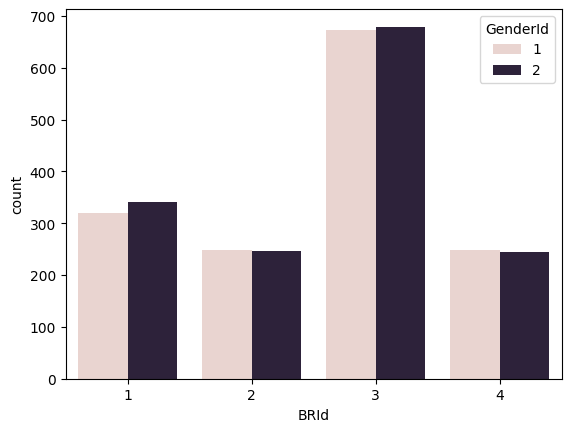

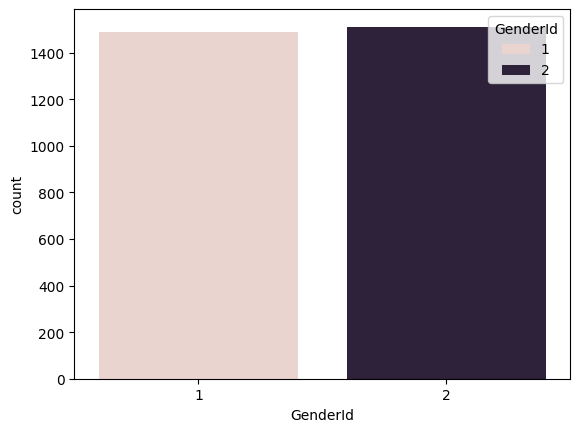

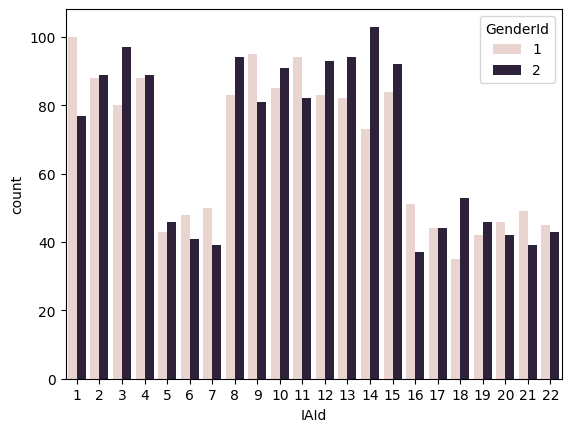

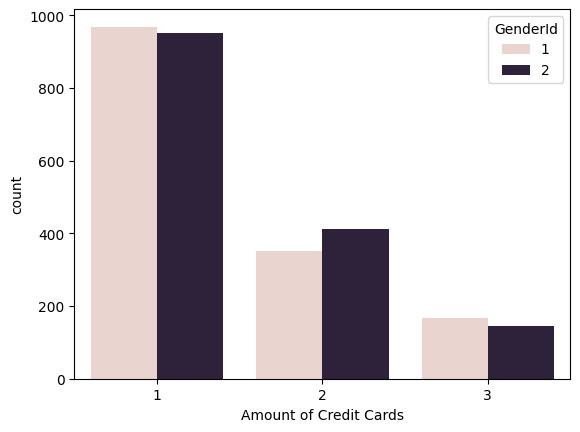

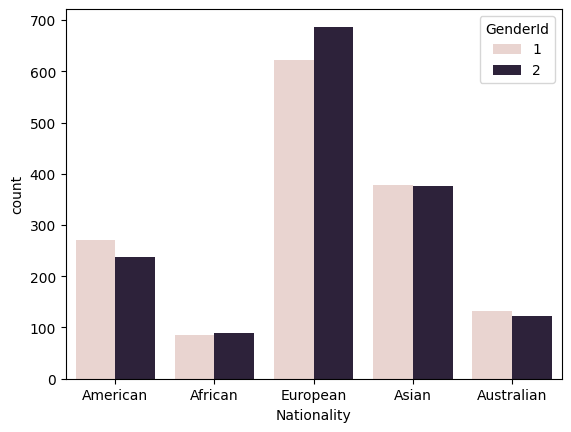

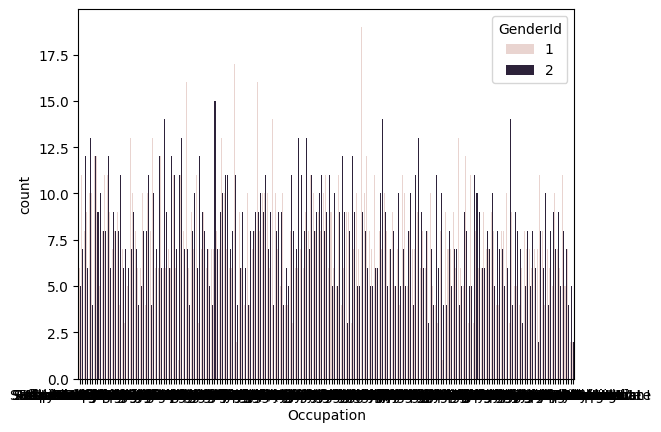

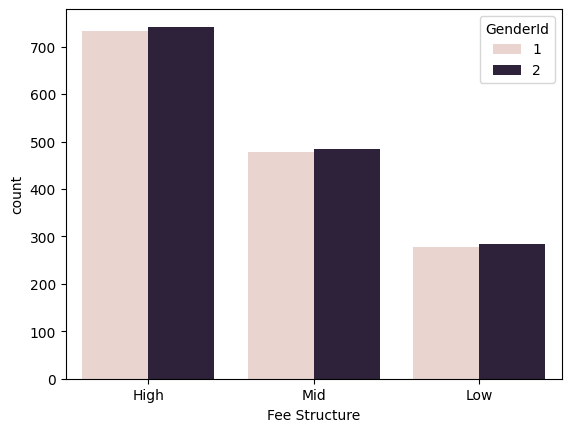

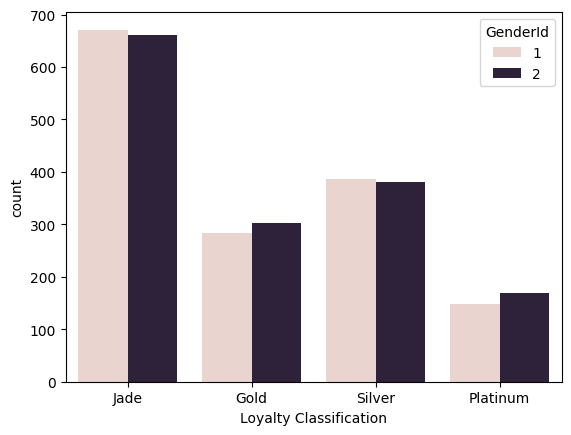

In [ ]:
for i, predictor in enumerate(df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality","Occupation", "Fee Structure", "Loyalty Classification"]]):
  plt.figure(i)
  sns.countplot(data=df, x=predictor, hue='GenderId')

In [ ]:
for col in categorical_cols:
  if col == "Occupation":
    continue
  plt.figure(figsize=(10, 6))
  sns.histplot(df[col])
  plt.title("Histogram of Occupation Count")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

NameError: name 'categorical_cols' is not defined

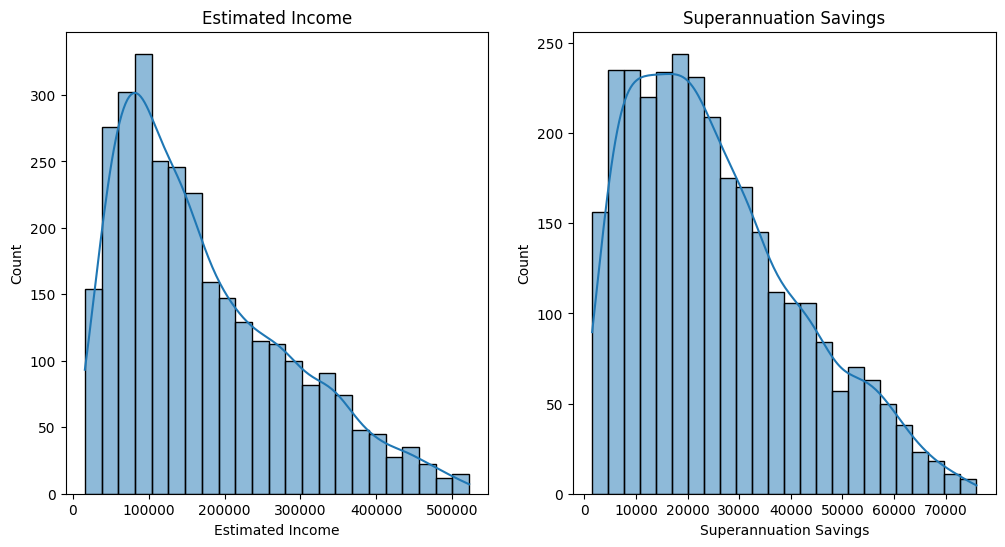

In [16]:
numerical_cols = ["Estimated Income", "Superannuation Savings"]
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
  plt.subplot(1, 2, i)
  sns.histplot(df[col], kde=True)
  plt.title(col)
plt.show()